In [1]:
!pip install ts2vg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.8 MB/s eta 0:00:00


In [2]:
!pip install fbm

In [3]:
from ts2vg import NaturalVG
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM
import itertools
from sklearn.linear_model import LinearRegression

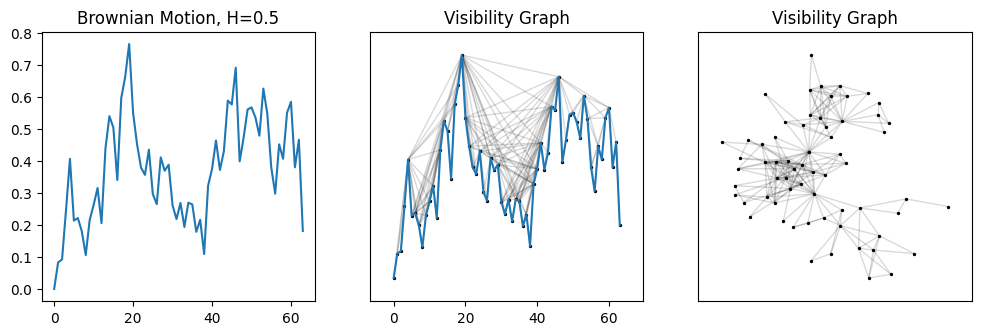

In [4]:
f = FBM(63, 0.5)
ts = f.fbm()



g = NaturalVG(directed=None).build(ts)
nxg = g.as_networkx()


fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(ts)
ax0.set_title("Brownian Motion, H=0.5")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(ts)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg, ax=ax2, pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)
ax2.set_title("Visibility Graph")


plt.show()

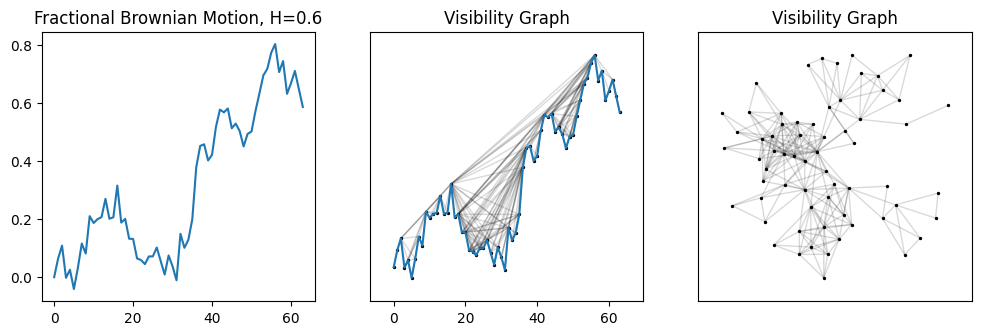

In [5]:
f = FBM(63, 0.6)
f06 = f.fbm()

g06 = NaturalVG(directed=None).build(f06)
nxg06 = g06.as_networkx()


fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(f06)
ax0.set_title("Fractional Brownian Motion, H=0.6")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg06, ax=ax1, pos=g06.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(f06)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg06, ax=ax2, pos=nx.kamada_kawai_layout(nxg06), **graph_plot_options)
ax2.set_title("Visibility Graph")


plt.show()

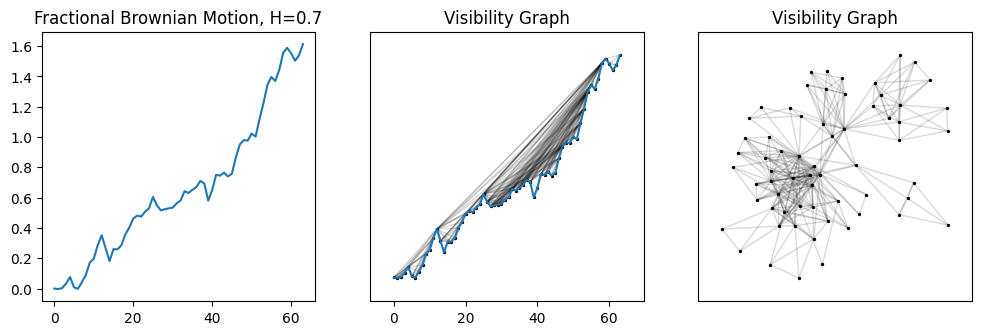

In [6]:
f = FBM(63, 0.7)
f07 = f.fbm()

g07 = NaturalVG(directed=None).build(f07)
nxg07 = g07.as_networkx()


fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(f07)
ax0.set_title("Fractional Brownian Motion, H=0.7")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg07, ax=ax1, pos=g07.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(f07)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg07, ax=ax2, pos=nx.kamada_kawai_layout(nxg07), **graph_plot_options)
ax2.set_title("Visibility Graph")


plt.show()

In [7]:
#subtract mean
def centre(Y):
    means = np.cumsum(Y,axis=1)
    Y_hat = Y - means
    return Y_hat

In [8]:
#fitting
def linreg(Y):
    As = {}
    m = Y.shape[0]

    t = Y.shape[1]

    for s in range(1,t+1):
        x0 = np.arange(1,s+1)

        x = np.row_stack((x0,x0))

        for i, j in itertools.combinations(range(m), 2):

            y = Y[(i,j),:s]

            reg = LinearRegression(fit_intercept=False).fit(x, y)
            As[(i,j,s)] = reg.coef_
    return As

In [9]:
#exponent
def w(Y,A,qs):
    weights = {}
    m = Y.shape[0]

    t = Y.shape[1]

    #for s in range(4,t+1):
    for q in qs:

        #x0 = np.arange(1,s+1)

        #x = np.row_stack((x0,x0))

        for i, j in itertools.combinations(range(m), 2):

            #y = Y[(i,j),:s]
            zsq = []
            #for q in qs:
            for s in range(4,t+1):
                y = Y[(i,j),:s]
                x0 = np.arange(1,s+1)

                x = np.row_stack((x0,x0))
                zs = 0
                for k in range(3,s):

                    z = y[:,:k].T - As[(i,j,k)] @ x[:,:k].T
                    if q != 0:
                        z = np.power(np.linalg.norm(z,ord=2),q)
                    else:
                        z = np.log(np.linalg.norm(z,ord=2))
                    zs += z
                if q != 0:
                    zs = np.float_power(zs,1/q)

                zsq.append(zs)
            if q != 0:

                weights[(i,j,q)] = np.polyfit(np.log(np.array(zsq)),np.log(range(4,t+1)),1)[0]
            else:
                weights[(i,j,q)] = np.polyfit(np.array(zsq),np.log(range(4,t+1)),1)[0]

    return weights

In [10]:

Y = np.row_stack((ts,f06,f07))
Yhat = centre(Y)
As = linreg(Yhat)
q = np.arange(-5,6)
weights = w(Yhat,As,q)

In [11]:
weights.values()

dict_values([-14.839913319736016, -596.0313260809211, -1074.32298783932, -11.781220998872948, -212.29925979603735, -248.1905709942673, -8.768611814811724, -71.99571617087048, -51.26796085206644, -5.81357067871434, -23.351152670478715, -9.935529599952021, -3.5865691613386805, -4.366074506304751, -1.8557042267235901, 0.013721095373330904, 0.017750263084952755, 0.013588794141810228, 0.2779263242676204, 0.3470138767362106, 0.26545322023064866, 0.33498132382593915, 0.44501949962956594, 0.2933102269805964, 0.35761859517107497, 0.48963349353712066, 0.30202338125788925, 0.3693440675893767, 0.5139943242957458, 0.30609758016244604, 0.3763814413475012, 0.528734403948716, 0.3083804585289597])

In [12]:
weights.keys()

dict_keys([(0, 1, -5), (0, 2, -5), (1, 2, -5), (0, 1, -4), (0, 2, -4), (1, 2, -4), (0, 1, -3), (0, 2, -3), (1, 2, -3), (0, 1, -2), (0, 2, -2), (1, 2, -2), (0, 1, -1), (0, 2, -1), (1, 2, -1), (0, 1, 0), (0, 2, 0), (1, 2, 0), (0, 1, 1), (0, 2, 1), (1, 2, 1), (0, 1, 2), (0, 2, 2), (1, 2, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 4), (0, 2, 4), (1, 2, 4), (0, 1, 5), (0, 2, 5), (1, 2, 5)])

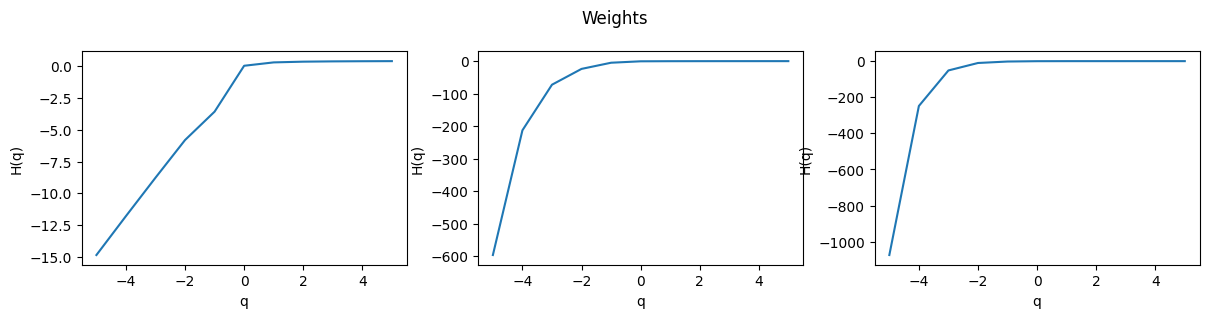

In [13]:
h56 = []
h57 = []
h67 = []
for i in range(-5,6):
    h56.append(weights[(0,1,i)])
    h57.append(weights[(0,2,i)])
    h67.append(weights[(1,2,i)])
fig, axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle('Weights')
axs[0].plot(q, np.array(h56))
axs[1].plot(q, np.array(h57))
axs[2].plot(q, np.array(h67))
fig.tight_layout()
for ax in axs.flat:
    ax.set(xlabel='q', ylabel='H(q)')
plt.show()